In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df=pd.read_csv("Q1.csv",header=None)
df.sample(frac=1,random_state=345)
df.columns=["y",'x1','x2']
X=df.drop("y",axis=1).values.astype(float)
Y=df['y'].values.astype(float)
Y=np.expand_dims(Y,axis=1)
print(Y.shape)


(100, 1)


In [10]:
def train_test_split(X,Y,split):
    # split belongs [0,1]
    split_num=int(Y.shape[0]*split)
    Y_1=Y[:split_num,:]
    Y_2=Y[split_num:,:]
    X_1=X[:split_num,:]
    X_2=X[split_num:,:]
    return X_1,X_2,Y_1,Y_2

xt,xv,yt,yv=train_test_split(X,Y,0.8)
print(xt.shape,yt.shape,xv.shape,yv.shape)

(80, 2) (80, 1) (20, 2) (20, 1)


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC(kernel="linear")
yt=yt.ravel()
model.fit(xt,yt)
pred=model.predict(xv)
print(accuracy_score(yv,pred))

1.0


In [12]:
w=model.coef_
b=model.intercept_
print(w)
print(b)

[[-1.71790295  1.15354909]]
[1.96911106]


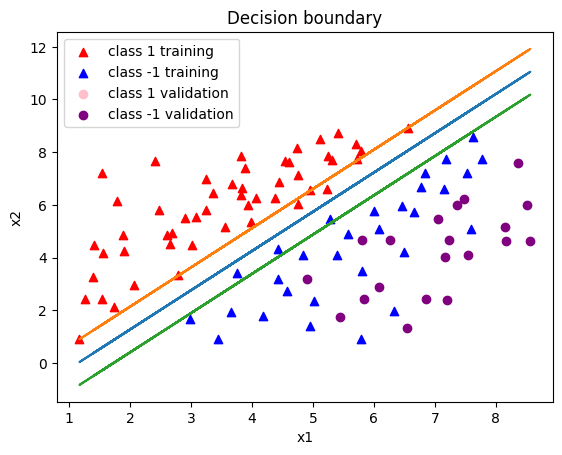

In [19]:
yt=yt.ravel()
mask=(yt==1)
plt.scatter(xt[mask,0],xt[mask,1],c="red",marker="^",label="class 1 training")
mask=(yt==-1)
plt.scatter(xt[mask,0],xt[mask,1],c="blue",marker="^",label="class -1 training")

yv=yv.ravel()
mask=(yv==1)
plt.scatter(xv[mask,0],xv[mask,1],c='pink',label="class 1 validation")
mask=(yv==-1)
plt.scatter(xv[mask,0],xv[mask,1],c='purple',label="class -1 validation")

plt.plot(df["x1"],-(b[0]+df["x1"]*w[0][0])/w[0][1])
plt.plot(df["x1"],-(b[0]+df["x1"]*w[0][0]-1)/w[0][1])
plt.plot(df["x1"],-(b[0]+df["x1"]*w[0][0]+1)/w[0][1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision boundary")
plt.legend()
plt.show()

In [51]:
import cvxpy as cp

class SVM_manual:
    def __init__(self):
        self.weights=None
        self.intercept=None
        self.xi_min=None
        self.support_vectors=None
    def fit(self,xt,yt):
        n,d=xt.shape
        const=1.0
        xi=cp.Variable(n)
        w=cp.Variable(d)
        b=cp.Variable()
        obj=cp.Minimize(cp.norm(w,2)**2 + const*cp.sum(xi))
        constraint=[cp.multiply(yt,(xt@w+b))>=1-xi,xi>=0]
        prob=cp.Problem(obj,constraints=constraint)
        prob.solve()
        print(prob.status)
        self.weights=w.value
        self.intercept=b.value
        h=yt*(xt@w+b)
        mask=np.isclose(h,1-xi,atol=1e-6)
        self.xi_min=xi.value[mask]
        self.support_vectors=xt[mask]
    def predict(self,x):
        pred=x@self.weights+self.intercept
        pred=np.array(pred)
        pred=np.where(pred>=0,1,pred)
        pred=np.where(pred<0,-1,pred)
        return pred



In [52]:
SVM_model=SVM_manual()
SVM_model.fit(xt,yt)
print(SVM_model.weights,SVM_model.intercept,SVM_model.xi_min,SVM_model.support_vectors)

optimal


c:\Users\prem\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\expressions\expression.py:683: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [45]:
valpred=SVM_model.predict(xv)
print(valpred)
trainpred=SVM_model.predict(xt)
print(trainpred)
print("training accuracy",accuracy_score(yt,trainpred))
print("validation accuracy", accuracy_score(yv,valpred))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.]
training accuracy 1.0
validation accuracy 1.0


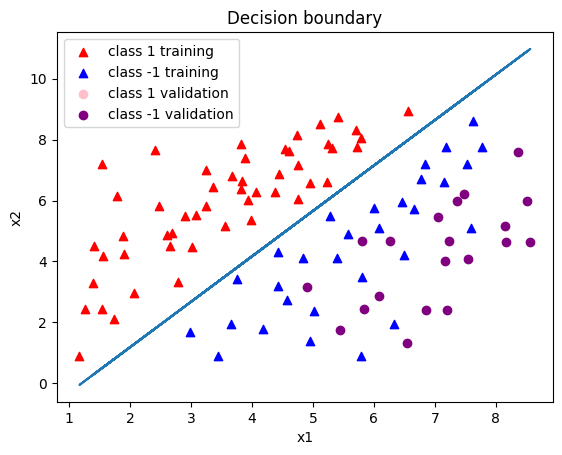

In [46]:
b=SVM_model.intercept
w=SVM_model.weights
xi_min=SVM_model.xi_min
yt=yt.ravel()
mask=(yt==1)
plt.scatter(xt[mask,0],xt[mask,1],c="red",marker="^",label="class 1 training")
mask=(yt==-1)
plt.scatter(xt[mask,0],xt[mask,1],c="blue",marker="^",label="class -1 training")

yv=yv.ravel()
mask=(yv==1)
plt.scatter(xv[mask,0],xv[mask,1],c='pink',label="class 1 validation")
mask=(yv==-1)
plt.scatter(xv[mask,0],xv[mask,1],c='purple',label="class -1 validation")

plt.plot(df["x1"],-(b+df["x1"]*w[0])/w[1])
# plt.plot(df["x1"],-(b+df["x1"]*w[0]-xi_min)/w[1])
# plt.plot(df["x1"],-(b+df["x1"]*w[0]+xi_min)/w[1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision boundary")
plt.legend()
plt.show()